In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

# Social Welfare of EPEC vs SUM all DAs

In [86]:
path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV", "objective_20221021-185407.csv"))
Mpec_df = pd.read_csv(path)
Mpec_df = Mpec_df.drop(index = 0)

In [87]:
path = "results_lin_comp_market_10-17-2022@20.41.xlsx"
df_lin = pd.read_excel(path,'Objective_Function', header=None)

In [88]:
sum_lists=[]
sum_lists.append(Mpec_df.sum(axis=1).to_list())
sum_lists.append([df_lin.sum(axis=1).values[0] for x in range(len(Mpec_df.sum(axis=1).to_list()))])

In [89]:
sum_df = pd.DataFrame(sum_lists)
#sum_df = sum_df.rename(columns=time_dict)
sum_df['Model'] = ['Mpec', 'Optimal']
sum_df = sum_df.melt(id_vars='Model',var_name='Iteration', value_name='SocialWelfare')
#sum_df = change_time(sum_df)

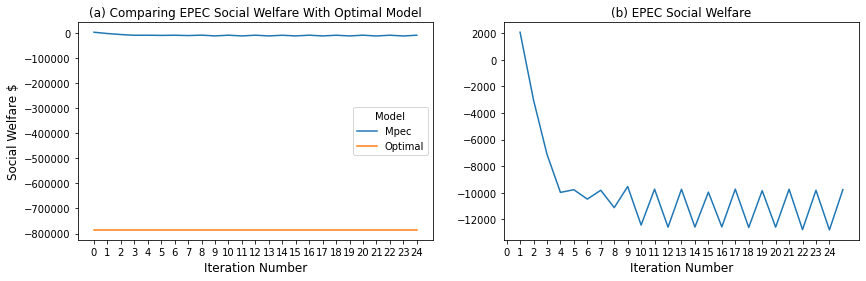

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.lineplot(data= sum_df,  x='Iteration', y='SocialWelfare', hue='Model', ax=axes[0])#hue='category'
axes[0].set(xticks=[x for x in range(Mpec_df.shape[0])]);
axes[0].set_title("(a) Comparing EPEC Social Welfare With Optimal Model", fontsize=12)
axes[0].set_xlabel('Iteration Number',fontsize=12);
axes[0].set_ylabel('Social Welfare $',fontsize=12);

sns.lineplot(data= Mpec_df.sum(axis=1),  ax=axes[1])
axes[1].set_title("(b) EPEC Social Welfare", fontsize=12)
axes[1].set_xlabel('Iteration Number',fontsize=12);
axes[1].set(xticks=[x for x in range(Mpec_df.shape[0])]);
#axes[1].set_ylabel('Social Welfare $',fontsize=12)
#fig.savefig("Optimal_vs_EPEC_SocialWelfare.png", bbox_inches='tight')

In [102]:
Mpec_df.shape[0]

25